# Adult

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# change the trees

## Loading Data

In [10]:
Datset = pd.read_csv("/Users/annikatimermanis/Desktop/project/Classification/Classification_Datasets/5_Adult/adult.data",delimiter=',') 


In [11]:
df = pd.DataFrame(Datset)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Data preparation and Analysis

In [12]:
print(np.count_nonzero(Datset==np.nan))

0


In [17]:
# frequency = df['<=50k'].value_counts()
# print(frequency)
# print("-------")

In [19]:
# plt.plot()
# plt.ylabel('Frequency')
# plt.xlabel('Class')
# plt.bar( ("1","0"), frequency)
# plt.suptitle("Distributation")
# plt.show()

In [7]:
# sns.pairplot(df, hue="Class")
# print("ok")

In [24]:
# plt.figure(figsize=(17,17))
# sns.heatmap(df.corr(), annot =True)

In [25]:
# loop to iterate through all columns in dataframe and check if the data is string type
for column in df:
    if type(df[column][0]) == str:
        # if data in column is type string, we want to convert it to equivalent numerical labels
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(df[column])
        df[column] = integer_encoded

In [26]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


### Defining Dictionary of Models

In [27]:
MODELS = {'logistic_r', 'svc', 'tree', 'forest', 'knn', 'adaboost', 'gnb', 'nn'}
adult_dict = {}    

## Train and Test set

In [28]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
# y = df.Class.apply(lambda x: pd.to_numeric(str(x)[2]))

In [29]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [30]:
StScale = StandardScaler()
X_train = StScale.fit_transform(X_train)
X_test = StScale.transform(X_test)

In [31]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    
    table.append(['Mean Squared Error', mse])
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])

    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    return prediction

## 1. LogisticRegression for Classification

In [32]:
logistic_r = LogisticRegression(random_state=0)
logistic_r.fit(X_train, y_train)

LogisticRegression(random_state=0)

## LogisticRegression Analysis

In [33]:
adult_dict['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(adult_dict['logistic_r'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Mean Squared Error     | 0.176443 |
+------------------------+----------+
| Accuracy               | 0.823557 |
+------------------------+----------+
| weighted_f1            | 0.807467 |
+------------------------+----------+
| macro_f1               | 0.716388 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4957
           1       0.71      0.44      0.54      1555

    accuracy                           0.82      6512
   macro avg       0.78      0.69      0.72      6512
weighted avg       0.81      0.82      0.81      6512

[[4683  274]
 [ 875  680]]


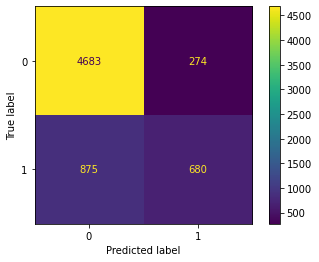

In [34]:
print(classification_report(y_test, lr_prediction))
print(confusion_matrix (y_test, lr_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, lr_prediction);

## 2. Support vector classification

In [35]:
svc = SVC().fit(X_train, y_train)

In [36]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
}
svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 1/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.793 total time=  16.3s
[CV 2/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 2/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.798 total time=  15.2s
[CV 3/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 3/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.801 total time=  15.3s
[CV 4/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 4/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.794 total time=  15.5s
[CV 5/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 5/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.801 total time=  15.9s
[CV 1/5; 2/10] START C=250, gamma=0.01..........................................
[CV 1/5; 2/10] END ...........C=250, gamma=0.01;

{'gamma': 0.01, 'C': 250}

In [37]:
svc_model.best_estimator_

SVC(C=250, gamma=0.01)

## Support vector classification Analysis

In [38]:
adult_dict['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(adult_dict['svc'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| gamma                  |   0.01     |
+------------------------+------------+
| C                      | 250        |
+------------------------+------------+
| Mean Squared Error     |   0.151259 |
+------------------------+------------+
| Accuracy               |   0.848741 |
+------------------------+------------+
| weighted_f1            |   0.840386 |
+------------------------+------------+
| macro_f1               |   0.770202 |
+------------------------+------------+


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4957
           1       0.75      0.55      0.64      1555

    accuracy                           0.85      6512
   macro avg       0.81      0.75      0.77      6512
weighted avg       0.84      0.85      0.84      6512

[[4667  290]
 [ 695  860]]


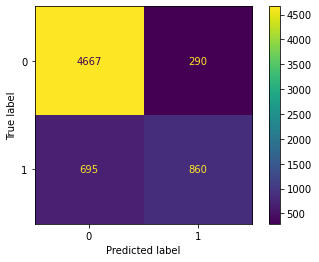

In [39]:
print(classification_report(y_test, svc_prediction))
print(confusion_matrix (y_test, svc_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, svc_prediction);

## Decision tree

In [40]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [41]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 8.103605819788694, 'min_samples_split': 0.08712929970154071}

## Decision tree Analysis

In [42]:
adult_dict['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(adult_dict['tree'])

+------------------------+-----------+
| Parameters / Metrics   |     Tuned |
+========================+===========+
| max_depth              | 8.10361   |
+------------------------+-----------+
| min_samples_split      | 0.0871293 |
+------------------------+-----------+
| Mean Squared Error     | 0.150952  |
+------------------------+-----------+
| Accuracy               | 0.849048  |
+------------------------+-----------+
| weighted_f1            | 0.836006  |
+------------------------+-----------+
| macro_f1               | 0.759112  |
+------------------------+-----------+


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4957
           1       0.79      0.50      0.61      1555

    accuracy                           0.85      6512
   macro avg       0.83      0.73      0.76      6512
weighted avg       0.84      0.85      0.84      6512

[[4754  203]
 [ 780  775]]


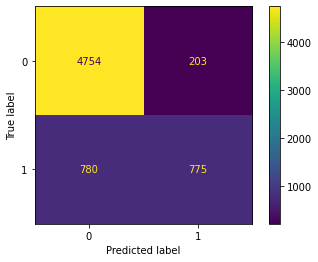

In [43]:
print(classification_report(y_test, tree_prediction))
print(confusion_matrix (y_test, tree_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, tree_prediction);

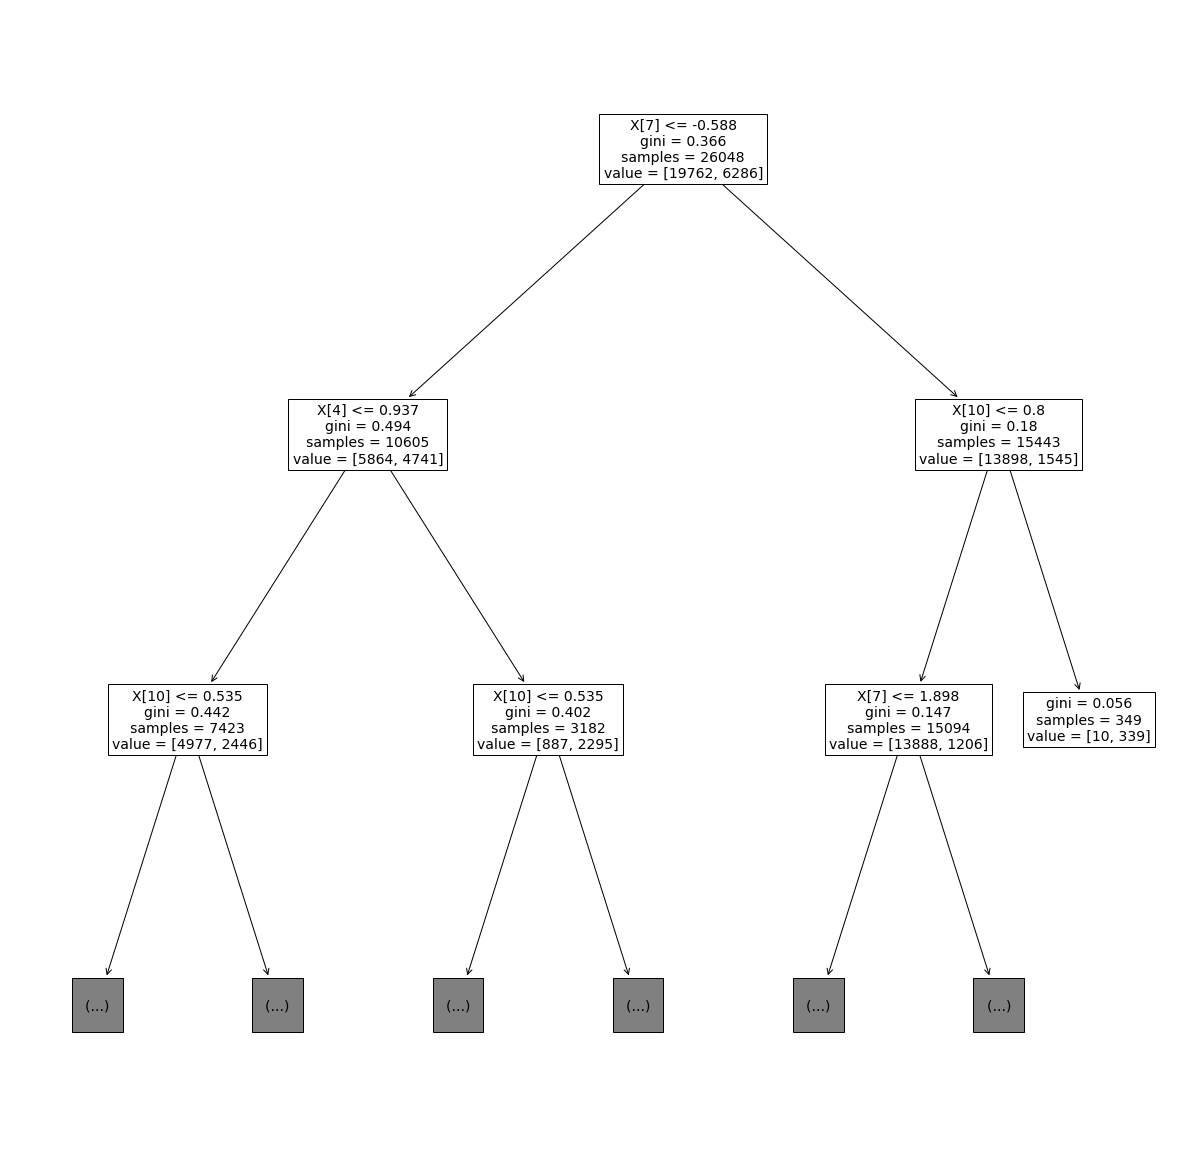

In [44]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

## 5. K-nearest neighbours


Fitting and hyperparameter search

In [45]:
from sklearn import neighbors
import sklearn
import scipy

knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [46]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'], 'leaf_size': scipy.stats.uniform(1, 50)}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "sklearn/neighbors/_binary_tree.pxi", line 1057, in sklearn.neighbors._kd_tree.BinaryTree.__setstate__
  File "sklearn/neighbors/_binary_tree.pxi", line 1001, in sklearn.neighbors._kd_tree.BinaryTree._update_memviews
  File "stringsource", line 658, in View.MemoryView.memoryview_c

best Hyperparameters = {'leaf_size': 20.172075941288885, 'n_neighbors': 40, 'weights': 'distance'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.82275046 0.82728058 0.83342294 0.82482351 0.83384524 0.82877778
 0.83073563 0.82943041 0.8245932  0.8330391  0.83330786 0.82225131
 0.82651277 0.8226352  0.82159867 0.83246321 0.8312731  0.79722055
 0.83215608 0.83161855 0.8226352  0.82463158        nan 0.82225131
 0.82474676]
  warnings.warn(


In [47]:
adult_dict["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(adult_dict['knn'])

+------------------------+---------------------+
| Parameters / Metrics   | Tuned               |
+========================+=====================+
| leaf_size              | 20.172075941288885  |
+------------------------+---------------------+
| n_neighbors            | 40                  |
+------------------------+---------------------+
| weights                | distance            |
+------------------------+---------------------+
| Mean Squared Error     | 0.16385135135135134 |
+------------------------+---------------------+
| Accuracy               | 0.8361486486486487  |
+------------------------+---------------------+
| weighted_f1            | 0.8292387901332053  |
+------------------------+---------------------+
| macro_f1               | 0.7564606518374236  |
+------------------------+---------------------+


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4957
           1       0.70      0.55      0.62      1555

    accuracy                           0.84      6512
   macro avg       0.78      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512

[[4585  372]
 [ 695  860]]


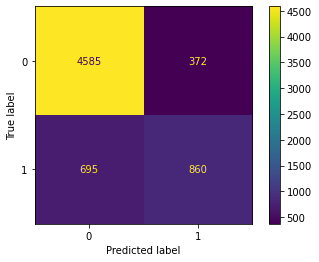

In [48]:
print(classification_report(y_test, knn_prediction))
print(confusion_matrix (y_test, knn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction);

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [49]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [51]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=5, n_iter=20).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters = {'learning_rate': 1.5876730327223614, 'n_estimators': 217}


In [52]:
adult_dict["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(adult_dict['adaboost'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| learning_rate          |   1.58767  |
+------------------------+------------+
| n_estimators           | 217        |
+------------------------+------------+
| Mean Squared Error     |   0.134214 |
+------------------------+------------+
| Accuracy               |   0.865786 |
+------------------------+------------+
| weighted_f1            |   0.861302 |
+------------------------+------------+
| macro_f1               |   0.803515 |
+------------------------+------------+


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4957
           1       0.76      0.63      0.69      1555

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.80      6512
weighted avg       0.86      0.87      0.86      6512

[[4652  305]
 [ 569  986]]


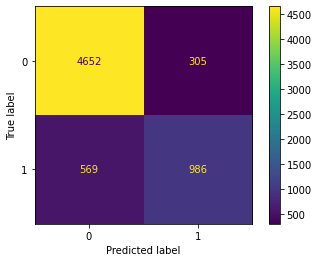

In [53]:
print(classification_report(y_test, adaboost_prediction))
print(confusion_matrix (y_test, adaboost_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_prediction);

## 7. Gaussian Naive Bayes classification

In [54]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB().fit(X_train, y_train)

In [ ]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

In [55]:
adult_dict["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(adult_dict['gnb'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Mean Squared Error     | 0.199939 |
+------------------------+----------+
| Accuracy               | 0.800061 |
+------------------------+----------+
| weighted_f1            | 0.772305 |
+------------------------+----------+
| macro_f1               | 0.656017 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4957
           1       0.67      0.32      0.43      1555

    accuracy                           0.80      6512
   macro avg       0.74      0.64      0.66      6512
weighted avg       0.78      0.80      0.77      6512

[[4712  245]
 [1057  498]]


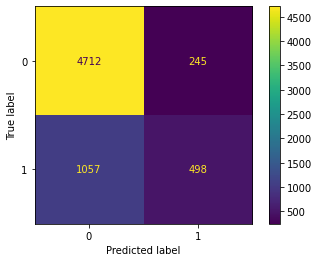

In [56]:
print(classification_report(y_test, naive_bayes_prediction))
print(confusion_matrix (y_test, naive_bayes_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, naive_bayes_prediction);

## 8. Neural Network classification

In [57]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=900)

In [58]:
param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters = {'leaf_size': 20.172075941288885, 'n_neighbors': 40, 'weights': 'distance'}


In [59]:
adult_dict["nn"] = {"model":mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(adult_dict['nn'])

+------------------------+---------------------+
| Parameters / Metrics   | Tuned               |
+========================+=====================+
| alpha                  | 0.06739390723749765 |
+------------------------+---------------------+
| learning_rate          | constant            |
+------------------------+---------------------+
| max_iter               | 1338                |
+------------------------+---------------------+
| Mean Squared Error     | 0.1471130221130221  |
+------------------------+---------------------+
| Accuracy               | 0.8528869778869779  |
+------------------------+---------------------+
| weighted_f1            | 0.8479716763846569  |
+------------------------+---------------------+
| macro_f1               | 0.7846313138433839  |
+------------------------+---------------------+


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4957
           1       0.73      0.61      0.66      1555

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.78      6512
weighted avg       0.85      0.85      0.85      6512

[[4610  347]
 [ 611  944]]


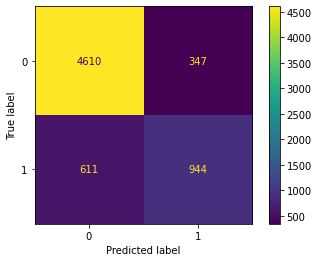

In [60]:
print(classification_report(y_test, nn_prediction))
print(confusion_matrix (y_test, nn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, nn_prediction);